___

<a href='https://mainacademy.ua/'> <img src='https://mainacademy.ua/wp-content/uploads/2019/03/logo-main.png' alt = 'Хмм, щось з інтернетом'/></a>
___

# Module 8: Unsupervised learning

## Lab work 8


#### Мета: 

* навчитися використовувати моделі без учителем

### Завдання 1:

Опрацюйте файл `Groceries.csv`. Використовуючи алгоритм асоціативних зв'язків, знайдіть:
- зробіть описову статистику даного файлу
- ведіть топ-3 продукти, що продаються
- виведіть топ-2 пари продуктів, що продаються
- придумайте, як отриману інформацію можна використатти (опишіть в 3-4 реченнях)

In [59]:
# !pip install apyori

In [1]:
import pandas as pd
from apyori import apriori

df = pd.read_csv('/data/notebook_files/groceries.csv')
df.describe()

,Item(s)
count,9835.000000
mean,4.409456
std,3.589385
min,1.000000
25%,2.000000
50%,3.000000
75%,6.000000
max,32.000000


In [2]:
df.shape

(9835, 33)

In [3]:
item_counts = df.iloc[:, 1:].stack().value_counts()
item_counts.head(3)

whole milk 2513
other vegetables 1903
rolls/buns 1809
dtype: int64

In [4]:
item_list_df = df.drop(['Item(s)'], axis=1)

In [5]:
# recipts = []

# for i in range(df.shape[0]):
#     N = df['Item(s)'][i] 
#     list_of_items = item_list_df.iloc[i:i+1, :N].values.tolist()
#     recipts.append(list_of_items[0])

# recipts

In [6]:
transactions = []
for i in range(df.shape[0]):
    transactions.append([str(item_list_df.values[i,j]) for j in range(df.shape[1]-1) if not pd.isnull(item_list_df.values[i, j])])

In [7]:
def create_rules(transactions, min_support, min_cinfidence, min_lift, min_length, max_length):
    rules = apriori(transactions,
                min_support = min_support, 
                min_cinfidence = min_cinfidence, 
                min_lift = min_lift, 
                min_length = min_length,
                max_length = max_length)
    results = list(rules)
    return results

def inspect(results):
    lhs         =[tuple(result[2][0][0])[0] for result in results]
    rhs         =[tuple(result[2][0][1])[0] for result in results]
    supports    =[result[1] for result in results]
    confidences =[result[2][0][2] for result in results]
    lifts        =[result[2][0][3] for result in results]
    return list (zip(lhs, rhs, supports, confidences, lifts))

def result_to_DF(result):
    result_to_DF = pd.DataFrame(inspect(result), 
                                  columns = ["Left hand side", "Right hand side", "Support", "Confidence", "Lift"])
    return result_to_DF

In [8]:
result1 = create_rules(transactions, 0.001, 0.2, 3, 2, 2)
result_to_DF(result1).nlargest(n = 10, columns = "Lift")

,Left hand side,Right hand side,Support,Confidence,Lift
136,mayonnaise,mustard,0.001423,0.155556,12.965160
1,Instant food products,hamburger meat,0.003050,0.379747,11.421438
73,detergent,softener,0.001118,0.058201,10.600137
130,liquor,red/blush wine,0.002135,0.192661,10.025484
81,flour,sugar,0.004982,0.286550,8.463112
153,popcorn,salty snack,0.002237,0.309859,8.192110
105,ham,processed cheese,0.003050,0.117188,7.070792
114,hamburger meat,sauces,0.001220,0.036697,6.683656
63,cream cheese,meat spreads,0.001118,0.028205,6.604701
69,detergent,house keeping products,0.001017,0.052910,6.345980


In [9]:
result2 = create_rules(transactions, 0.002, 0.2, 3, 2, 2)
result_to_DF(result2).nlargest(n = 10, columns = "Lift")

,Left hand side,Right hand side,Support,Confidence,Lift
0,Instant food products,hamburger meat,0.003050,0.379747,11.421438
37,liquor,red/blush wine,0.002135,0.192661,10.025484
22,flour,sugar,0.004982,0.286550,8.463112
38,popcorn,salty snack,0.002237,0.309859,8.192110
30,ham,processed cheese,0.003050,0.117188,7.070792
39,processed cheese,white bread,0.004169,0.251534,5.975445
33,hamburger meat,pasta,0.002745,0.082569,5.486920
1,baking powder,sugar,0.003254,0.183908,5.431639
8,bottled beer,liquor,0.004677,0.058081,5.240594
32,ham,white bread,0.005084,0.195312,4.639851


In [10]:
result3 = create_rules(transactions, 0.005, 0.5, 3, 2, 2)
result_to_DF(result3).nlargest(n = 10, columns = "Lift")

,Left hand side,Right hand side,Support,Confidence,Lift
4,ham,white bread,0.005084,0.195312,4.639851
5,herbs,root vegetables,0.007016,0.431250,3.956477
1,berries,whipped/sour cream,0.009049,0.272171,3.796886
6,hygiene articles,napkins,0.006101,0.185185,3.536498
2,chicken,frozen vegetables,0.006711,0.156398,3.251956
7,sausage,sliced cheese,0.007016,0.074675,3.047435
0,beef,root vegetables,0.017387,0.331395,3.040367
3,chocolate,waffles,0.005796,0.116803,3.039048


In [11]:
result_to_DF(result1).nlargest(n = 2, columns = "Support")

,Left hand side,Right hand side,Support,Confidence,Lift
14,beef,root vegetables,0.017387,0.331395,3.040367
18,berries,whipped/sour cream,0.009049,0.272171,3.796886


In [12]:
result_to_DF(result1).nlargest(n = 2, columns = "Confidence")

,Left hand side,Right hand side,Support,Confidence,Lift
122,herbs,root vegetables,0.007016,0.431250,3.956477
138,meat spreads,yogurt,0.001830,0.428571,3.072157


В залежності від того наскільки популярні товари ми розглядаємо, змінюються лідери в парах продажу.
Наприклад майонез в парі з гірчицею купляють найчастіше (ліфт > 12), але взагалі в транзакціях ця пара зустрічається не часто(менше 2% випадків), тоді як Продукцію швидкого приготування купують з м'ясом для гамбургерів частіше. Таким чином ми бачимо на скільки важливо підібрати правильні параметри для конкретної задачі.

- Отриманні данні можна використати для того щоб розмістити парні товари поряд один з одним в офлайн магазині.
- Також другий товар з пари можна пропонувати до покупки першого товару з пари.
- Також можна зробити висновки що при знижці на один з товарів з пари з високим ліфтом не слід робити знижку на інший.

### Завдання 2:

Завантажте файл https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python
 
- Спробуйте провести кластеризацію, тобто виділити цільові групи, для яких можна впроваджувати певні маркетингові акції
- Опишіть отримані результати

In [36]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn import metrics
import matplotlib.pyplot as plt

In [37]:
kaggle_df = pd.read_csv('/data/notebook_files/Mall_Customers.csv')
kaggle_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [38]:
kaggle_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [39]:
kaggle_df.shape

(200, 5)

In [40]:
kaggle_df.isnull().sum()

CustomerID 0
Gender 0
Age 0
Annual Income (k$) 0
Spending Score (1-100) 0
dtype: int64

In [41]:
# scaler = StandardScaler()
# columns_to_normalize = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
# kaggle_df[columns_to_normalize] = scaler.fit_transform(kaggle_df[columns_to_normalize])

In [42]:
# Male = 1 Female = 0
encoder = LabelEncoder()
kaggle_df['Gender_encoded'] = encoder.fit_transform(kaggle_df['Gender'])

In [43]:
model_df = kaggle_df.drop(['Gender','CustomerID' ], axis=1)

In [44]:
# model_df

In [45]:
model = PCA(n_components=2)
new_data = model.fit_transform(model_df)
#new_data
figures_df = pd.DataFrame(new_data, columns=['Col 1', 'Col 2'])
x_axis = figures_df['Col 1']
y_axis = figures_df['Col 2']

In [46]:
sum(model.explained_variance_ratio_)

0.8920961624646058

# KMeans

Text(0, 0.5, 'Inertia')

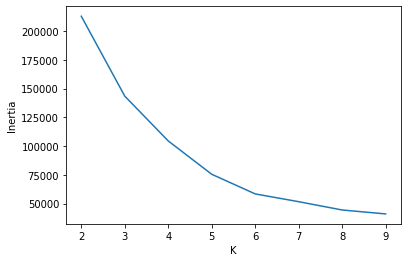

In [47]:
inertias = []
sizes = range(2, 10)
for k in sizes:
    k2 = KMeans(random_state=42, n_clusters=k)
    k2.fit(model_df)
    inertias.append(k2.inertia_)

fig, ax= plt.subplots(figsize=(6, 4))
pd.Series(inertias, index=sizes).plot(ax=ax)
ax.set_xlabel("K")
ax.set_ylabel("Inertia")

In [48]:
for i in range(2, 10):
    model = KMeans(n_clusters=i)
    model.fit(model_df)
    all_predictions = model.predict(model_df)
    s_score = metrics.silhouette_score(model_df, all_predictions)
    c_h_score = metrics.calinski_harabasz_score(model_df, all_predictions)
    d_b_score = metrics.davies_bouldin_score(model_df, all_predictions)
    print(f'For {i} classes\n Silhouette score: {s_score}\n Calinski-Harabasz Index: {c_h_score}\n Davies-Bouldin Index:{d_b_score}\n--------------------------\n')
 

For 2 classes
 Silhouette score: 0.29307334005502633
 Calinski-Harabasz Index: 89.26031302776754
 Davies-Bouldin Index:1.3573204663298617
--------------------------

For 3 classes
 Silhouette score: 0.383798873822341
 Calinski-Harabasz Index: 113.66664386810282
 Davies-Bouldin Index:0.8750649004457003
--------------------------

For 4 classes
 Silhouette score: 0.4052954330641215
 Calinski-Harabasz Index: 127.92482557839757
 Davies-Bouldin Index:0.8918193554892452
--------------------------

For 5 classes
 Silhouette score: 0.4402372958247734
 Calinski-Harabasz Index: 150.6053184277245
 Davies-Bouldin Index:0.827242629707305
--------------------------

For 6 classes
 Silhouette score: 0.45205475380756527
 Calinski-Harabasz Index: 166.58349562213596
 Davies-Bouldin Index:0.7475215820921529
--------------------------

For 7 classes
 Silhouette score: 0.4409411333609709
 Calinski-Harabasz Index: 162.14056670354333
 Davies-Bouldin Index:0.7892608969186631
--------------------------

For 8 

In [49]:
kmeans_model = KMeans(n_clusters=6)
kmeans_model.fit(model_df)
all_predictions = kmeans_model.predict(model_df)

# predicted_label = model.predict([[18, 33, 92, 0]])
# predicted_label

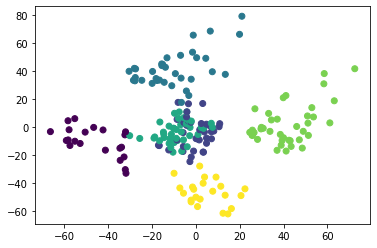

In [50]:
plt.scatter(x_axis, y_axis, c=all_predictions)
plt.show()

# Агломеративний алгоритм

In [51]:
mergings = linkage(model_df,  method='ward')

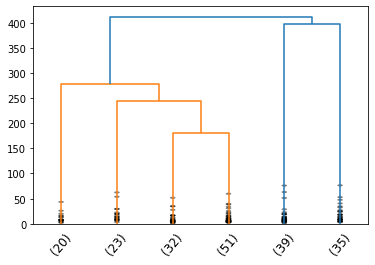

In [52]:
dendrogram(mergings,
           truncate_mode='lastp',   
           p=6,  
           leaf_rotation=50,
           show_contracted=True)

plt.show()

In [53]:
agglomerative_model = AgglomerativeClustering(n_clusters=6)
y_ac = agglomerative_model.fit_predict(model_df)

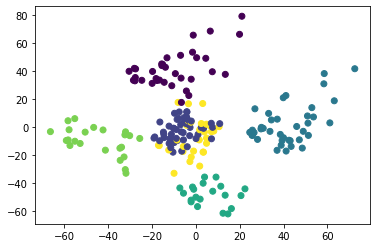

In [54]:
plt.scatter(x_axis, y_axis, c=y_ac)
plt.show()

# SpectralClustering

In [55]:
spectral_model = SpectralClustering(n_clusters = 6, 
                                        affinity='nearest_neighbors', 
                                        assign_labels='kmeans')
labels = spectral_model.fit_predict(model_df)

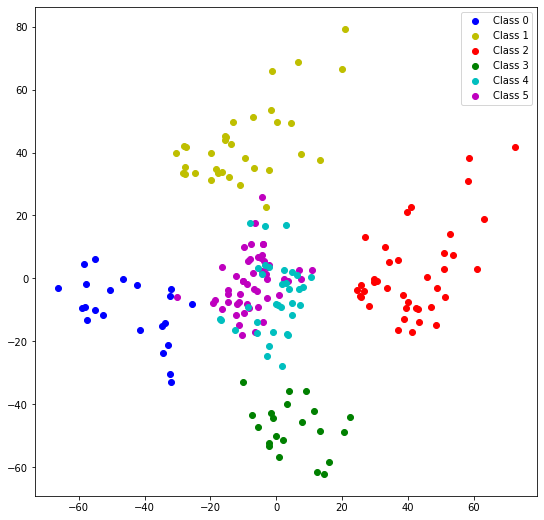

In [56]:
colours = ['b', 'r', 'y', 'g', 'm', 'c']
cvec = [colours[label] for label in labels]

plt.figure(figsize=(9, 9))
for label in set(labels):
    plt.scatter(x_axis[labels == label], y_axis[labels == label], c=colours[label])
plt.legend(handles=[plt.scatter([], [], c='b'), 
                    plt.scatter([], [], c='y'), 
                    plt.scatter([], [], c='r'), 
                    plt.scatter([], [], c='g'), 
                    plt.scatter([], [], c='c'),
                    plt.scatter([], [], c='m'),], 
           labels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'])
plt.show()

In [57]:
def count_metrics(df, model_name, predict):
    models_metrics = {}
    models_metrics['Model name'] = model_name
    models_metrics['Silhouette Score'] = round(metrics.silhouette_score(df, predict),2)
    models_metrics['Calinski-Harabasz Index'] = round(metrics.calinski_harabasz_score(df, predict),2)
    models_metrics['Davies-Bouldin Index'] = round(metrics.davies_bouldin_score(df, predict),2)
    return models_metrics

In [58]:
predictions = {'KMeans': all_predictions, 
               'AgglomerativeClustering': y_ac,
               'SpectralClustering': labels}

results = []

for key, value in predictions.items():
    results.append(count_metrics(model_df, key, value))

models_results = pd.DataFrame(results)
models_results

,Model name,Silhouette Score,Calinski-Harabasz Index,Davies-Bouldin Index
0,KMeans,0.45,166.58,0.75
1,AgglomerativeClustering,0.44,159.33,0.77
2,SpectralClustering,0.45,163.92,0.75


В даній задачі найкращий результат за показує метод кластеризації KMeans при розділенні на 6 класів. Також непоганий результат показує SpectralClustering, але Calinski-Harabasz Index трохи нижчий за KMeans.